# IMPORTING THE NECESSARY PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATASET

In [2]:
data = pd.read_csv('Coursera.csv')
print("Dataset read successfully")

Dataset read successfully


In [3]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


## EDA AND DATA PREPROCESSING

In [4]:
data.duplicated().sum()

98

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3424 non-null   object
 1   University          3424 non-null   object
 2   Difficulty Level    3424 non-null   object
 3   Course Rating       3424 non-null   object
 4   Course URL          3424 non-null   object
 5   Course Description  3424 non-null   object
 6   Skills              3424 non-null   object
dtypes: object(7)
memory usage: 214.0+ KB


In [8]:
data.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [9]:
data['University'].value_counts()

University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
University of Michigan                        101
Johns Hopkins University                      101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: count, Length: 184, dtype: int64

In [10]:
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: count, dtype: int64

In [11]:
data = data[data['Difficulty Level']!='Not Calibrated']
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner        1406
Advanced         991
Intermediate     823
Conversant       154
Name: count, dtype: int64

In [12]:
data['Course Rating'].value_counts()

Course Rating
4.7               696
4.6               588
4.8               579
4.5               377
4.4               231
4.9               172
4.3               153
4.2               119
5                  89
4.1                85
Not Calibrated     80
4                  49
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [13]:
import re
data = data[data['Course Rating']!='Not Calibrated']
data['Course Rating'] = data['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
data['Course Rating'].value_counts()

Course Rating
4.7    696
4.6    588
4.8    579
4.5    377
4.4    231
4.9    172
4.3    153
0.0    153
4.2    119
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

## DATA VISUALIZATION

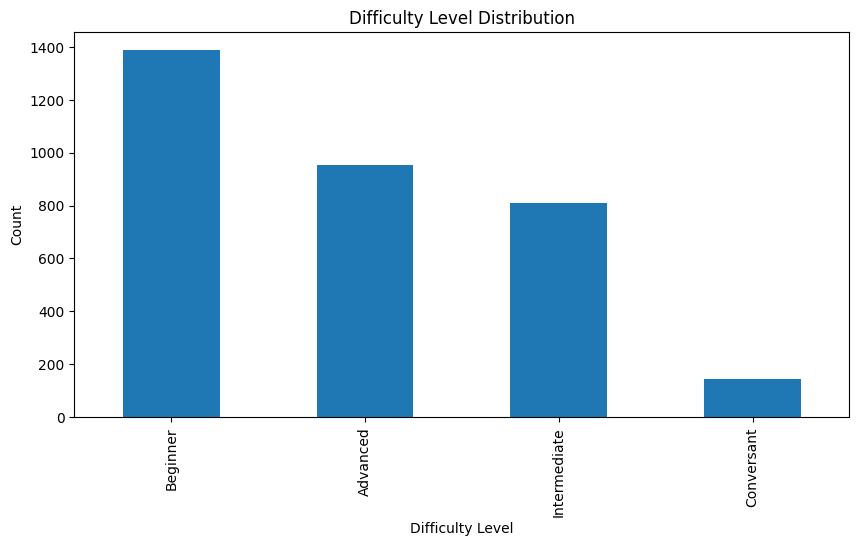

In [14]:
plt.figure(figsize=(10,5))
plt.title('Difficulty Level Distribution')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

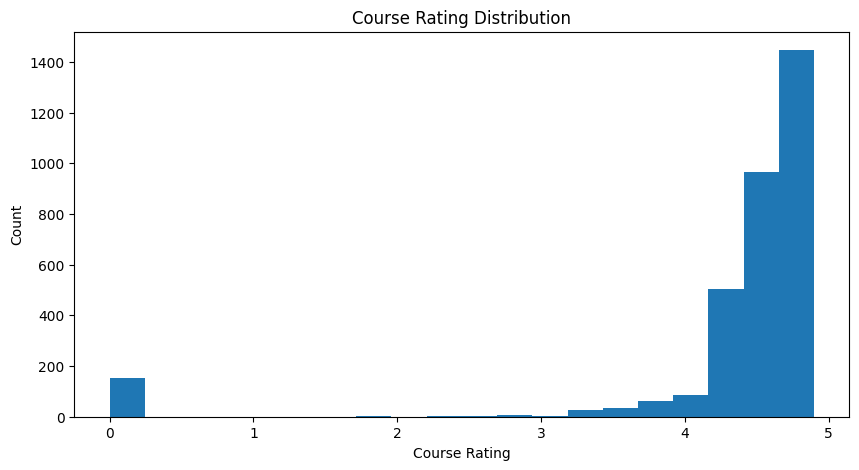

In [15]:
plt.figure(figsize=(10,5))
plt.title('Course Rating Distribution')
plt.xlabel('Course Rating')
plt.ylabel('Count')
plt.hist(data['Course Rating'], bins=20)
plt.show()

# MODEL BUILDING

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
data['Difficulty Level'] = le.fit_transform(data['Difficulty Level'])

In [18]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.metrics.pairwise import linear_kernel
# shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [21]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',lowercase=True)
tfidf_matrix =  tfidf_vectorizer.fit_transform(data['Course Name']+' '+data['Course Description']+' '+data['Skills'])

In [22]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [23]:
def recommend_courses(desc,top_n=10):
    description = ' '.join(desc)
    tfidf_desc = tfidf_vectorizer.transform([description])
    sim_score = list(enumerate(linear_kernel(tfidf_desc,tfidf_matrix)[0]))
    sim_score = sorted(sim_score,key=lambda x:x[1],reverse=True)

    crs_ind = [i[0] for i in sim_score[1:top_n+1]]
    recommended_courses = data[['Course Name','Course Rating']].iloc[crs_ind]
    recommended_courses = recommended_courses[recommended_courses['Course Rating'] > 3.5]
    
    return recommended_courses


In [27]:
user_input = input("Enter keywords (separated by spaces): ")
keywords = user_input.split()

if not keywords:
    print("No keywords provided.")
else:
    recommendations = recommend_courses(keywords)
    if recommendations.empty:
        print("No courses found based on keywords.")
    else:
        print("Recommended courses based on keywords:")
        df = pd.DataFrame(recommendations)
        if not df.empty:
            print(df.head())


Recommended courses based on keywords:
                                            Course Name  Course Rating
2446                                 Music for Wellness            4.6
584                          Music Business Foundations            4.8
2431                  Getting Started With Music Theory            4.1
533             Teaching Popular Music in the Classroom            4.7
1596  Approaching Music Theory: Melodic Forms and Si...            4.6
